<a href="https://colab.research.google.com/github/MarcoCarrillo/RedesNeuronales/blob/Curso/notebooks/03-Redes_neuronales_profundas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales profundas

> **Rodolfo Ferro** <br>
> Google Dev Expert en ML, 2020.
>
> _Redes:_
> - GitHub - [RodolfoFerro](https://github.com/RodolfoFerro)
> - Twitter - [@FerroRodolfo](https://twitter.com/FerroRodolfo)
> - Instagram - [@rodo_ferro](https://instagram.com/rodo_ferro)

## Contenidos

#### **Sección IV**
1. **Código:** El dataset de modas
2. **Código:** Preparación de datos
3. **Código:** Creación del modelo
4. **Código:** Entrenamiento del modelo
5. **Código:** Evaluación del modelo
6. **Código:** Predicción


## **Sección IV**

### El dataset de modas

Comencemos importando TensorFlow.

In [3]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas así:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

Llamar a `load_data` en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [5]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


¿Cómo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 9
Matrix: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 2

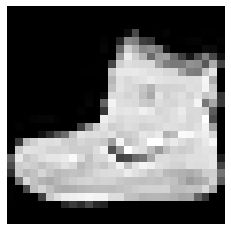

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 0

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

### Preparación de los datos

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **normalización**.

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Label: 9
Matrix: [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         

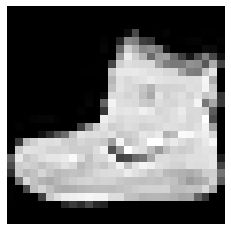

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 0

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

### Creación del modelo



In [28]:
model = tf.keras.models.Sequential([ #3 capas de un flatten de 28 x 28
            tf.keras.layers.Flatten(), #Estirar los pixeles y hacer un vector 784 pixeles
            tf.keras.layers.Dense(256, activation=tf.nn.relu), #128 neuronas
            tf.keras.layers.Dense(128, activation=tf.nn.relu), #128 neuronas
            tf.keras.layers.Dense(64, activation=tf.nn.relu), #128 neuronas
            tf.keras.layers.Dense(10, activation=tf.nn.softmax) #10 clases de salida
        ])

### Entrenamiento del modelo

In [29]:
model.compile(
    optimizer=tf.optimizers.Adam(), #Adam optimiza mas rapido para llegar al minimo
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
model.fit(training_images, training_labels, epochs=15) #Epocas de entrenamiento

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4883 - accuracy: 0.8215
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3648 - accuracy: 0.8655
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3280 - accuracy: 0.8789
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3030 - accuracy: 0.8863
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2866 - accuracy: 0.8924
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2743 - accuracy: 0.8974
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2611 - accuracy: 0.9013
Epoch 8/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2524 - accuracy: 0.9050
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2394 - accuracy: 0.9090
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.231

### Evaluación del modelo

In [31]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3781 - accuracy: 0.8809


[0.37810859084129333, 0.8809000253677368]

### Predicción


Label: 8
Prediction: 8


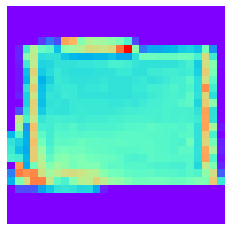

In [114]:
import random
test_index = random.randint(0,1000-1) #Imagenes de prueba = 10000-1

plt.imshow(test_images[test_index], cmap='rainbow')
plt.axis(False)

print("Label:", test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = model.predict(np.expand_dims(input_image, axis=-1))
print("Prediction:", np.argmax(prediction))

In [24]:
prediction

array([[4.8691690e-01, 6.1011506e-04, 7.1296254e-03, 4.7621173e-03, 7.0348087e-06, 1.0072007e-05, 5.0034231e-01, 2.7412844e-08, 2.2104691e-04, 6.9552539e-07]], dtype=float32)